# Notebook to look at phase of b1 firing

## Imports

In [1]:
import os 
import glob
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from matplotlib import rcParams
from mosquito.process_abf import load_processed_data, cluster_spikes
from mosquito.util import set_plot_params, my_adjust_axes, my_add_scalebar


## Load data

In [2]:
# load data file
data_folder = 39 
axo_num = 2  # 4

data = load_processed_data(data_folder, axo_num)


In [3]:
# read out data fields
t = data['time']
emg = data['emg']
wbf = data['wbf']
spike_idx = data['spike_idx']
spikes = data['spikes']
spike_t = data['spike_t']
mic_phase = data['mic_phase']


In [4]:
# set plot params
# PLOT PARAMETERS
plot_type = 'poster'  # 'paper' or 'powerpoint' or 'poster
plot_params = set_plot_params(plot_type=plot_type)


## Look at spikes

Text(0, 0.5, 'emg (V)')

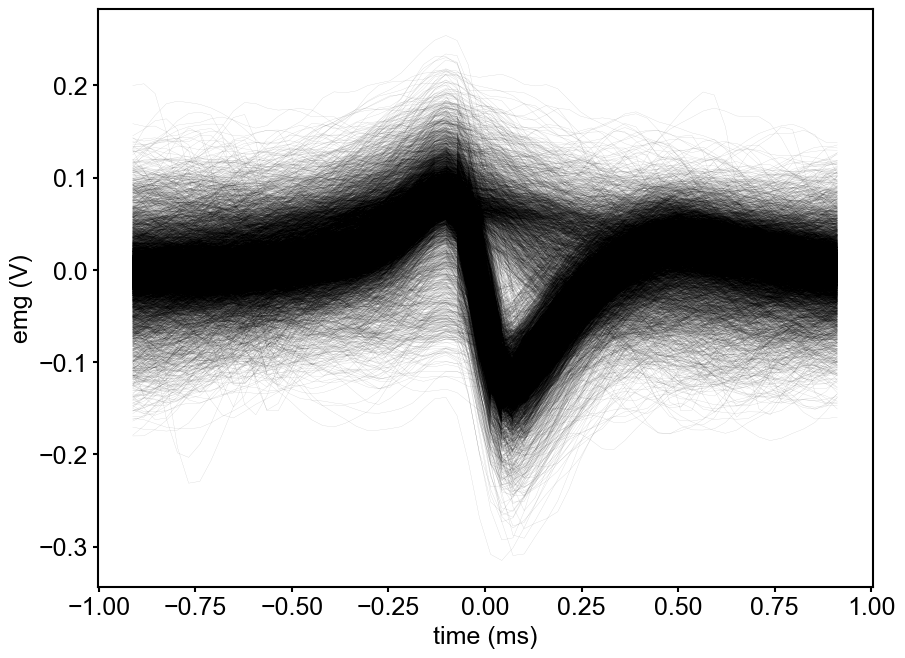

In [5]:
# quick visualization of spikes
fig, ax = plt.subplots()

for spike in spikes:
    ax.plot(1000*spike_t, spike, 'k-', alpha=0.2, lw=0.2)

ax.set_xlabel('time (ms)')
ax.set_ylabel('emg (V)')


## Need to sort out real spikes from noise

For n_clusters = 2 The average silhouette_score is : 0.509144887630129
For n_clusters = 3 The average silhouette_score is : 0.4061346175851216
For n_clusters = 4 The average silhouette_score is : 0.40313104601202676
For n_clusters = 5 The average silhouette_score is : 0.35311628156365465
For n_clusters = 6 The average silhouette_score is : 0.35036190141652546
For n_clusters = 7 The average silhouette_score is : 0.13321361940347914
For n_clusters = 8 The average silhouette_score is : 0.26888341303221486


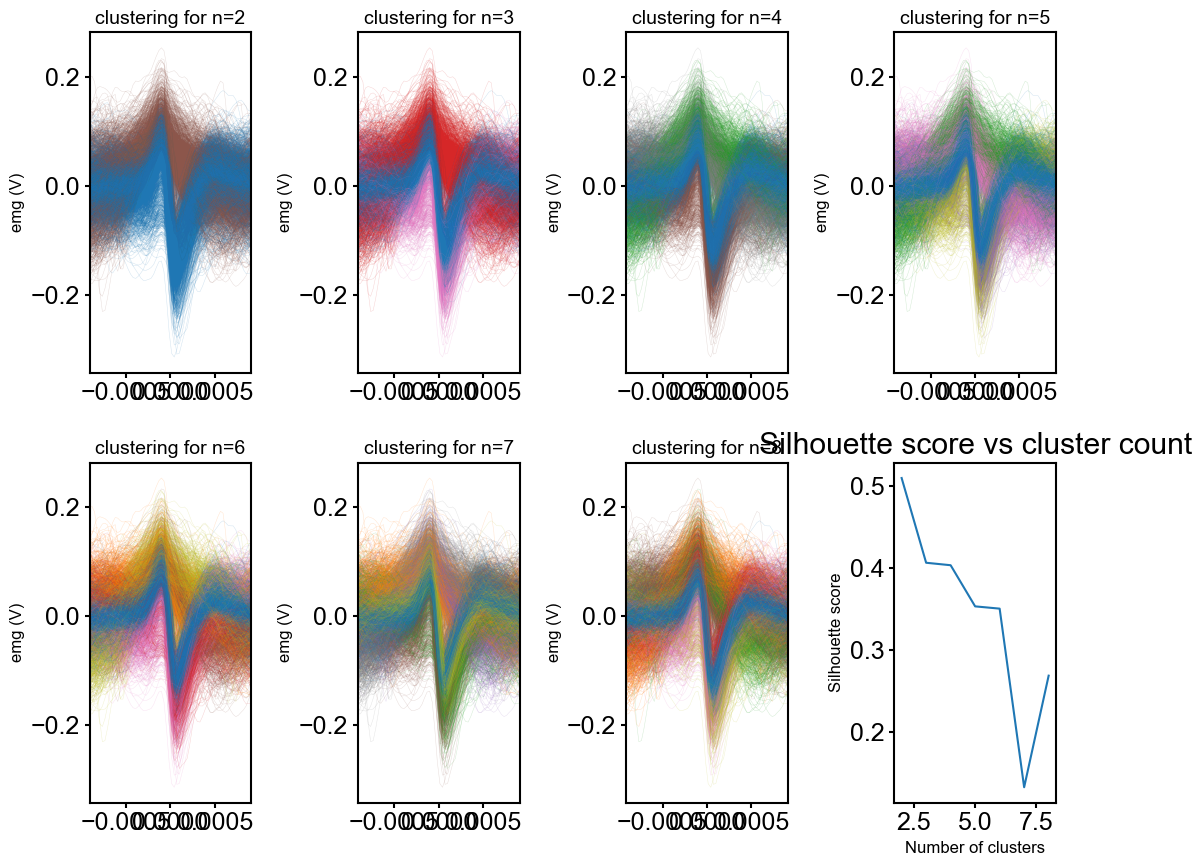

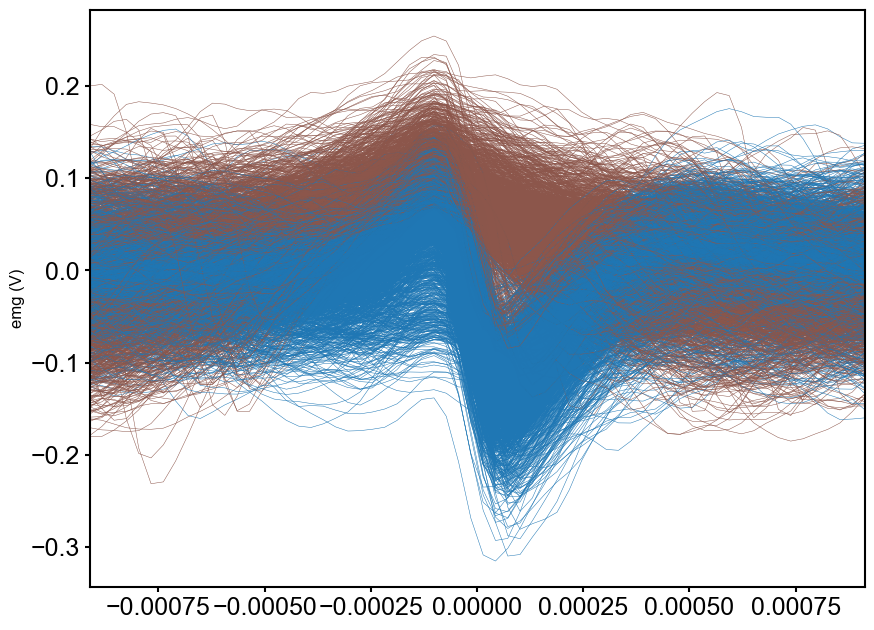

In [6]:
# use spike clustering function 
cluster_labels = cluster_spikes(spikes, spike_t=spike_t, viz_flag=True)


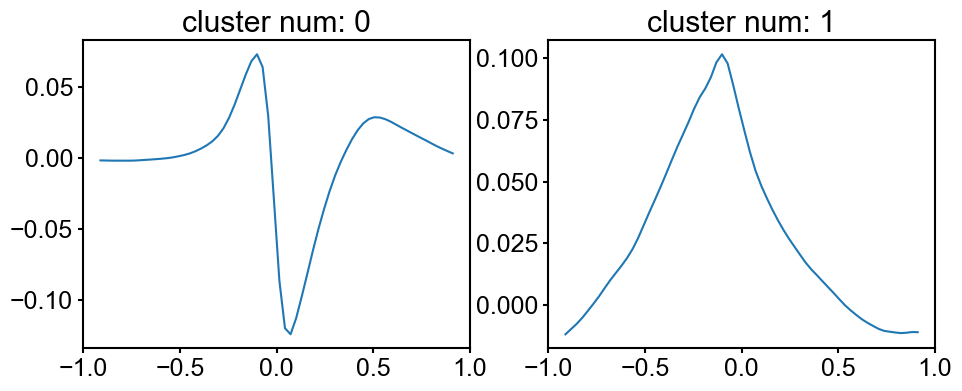

In [7]:
# looks like clustering into 2 groups does the trick. check which number is which and grab the right cluster
cluster_nums = np.unique(cluster_labels)
spike_array = np.vstack(spikes)

fig, ax_list = plt.subplots(1, cluster_nums.size, figsize=(11, 4))
ax_list = ax_list.ravel()

for ith, cnum in enumerate(cluster_nums):
    clust_idx = (cluster_labels == cnum)
    cluster_mean = np.mean(spike_array[clust_idx, :], axis=0)
    
    ax_list[ith].plot(1000*spike_t, cluster_mean)
    ax_list[ith].set_title(f'cluster num: {cnum}')
    

In [8]:
# in my case, cluster 0 is the right one, but this will vary. take only these values
good_cluster = 0
spikes = spikes[cluster_labels == good_cluster]
spike_idx = spike_idx[cluster_labels == good_cluster] 


Text(0, 0.5, 'emg (V)')

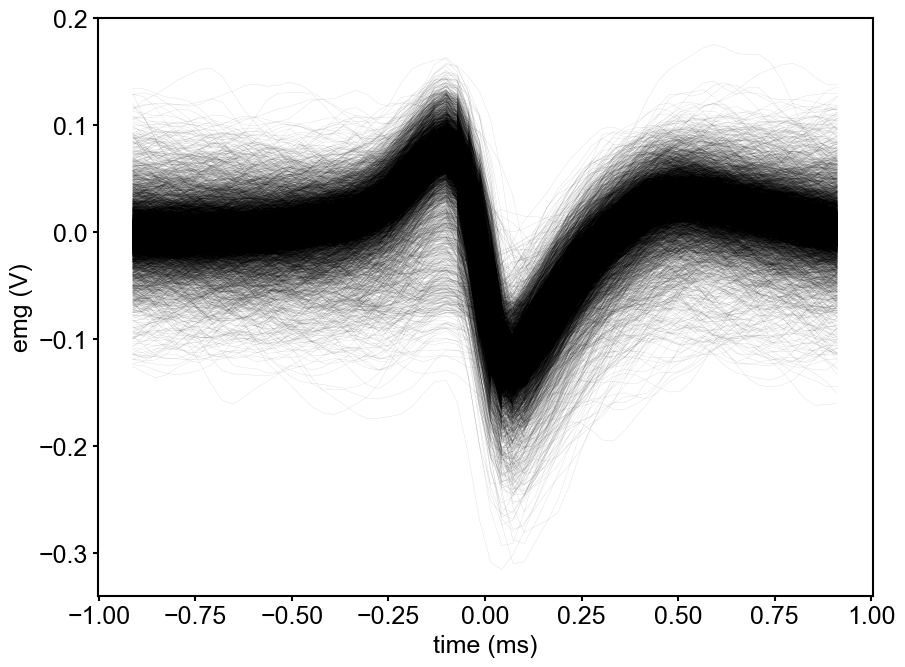

In [9]:
# check that we did that right with a quick visualization of spikes
fig, ax = plt.subplots()

for spike in spikes:
    ax.plot(1000*spike_t, spike, 'k-', alpha=0.2, lw=0.2)

ax.set_xlabel('time (ms)')
ax.set_ylabel('emg (V)')


## Incorporate mic phase

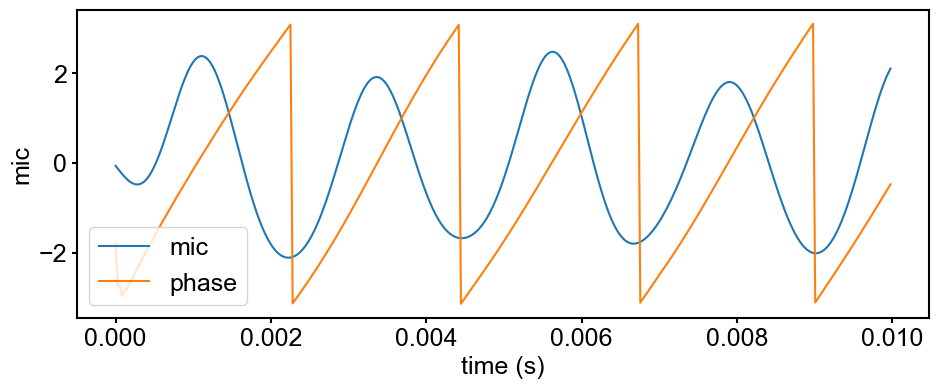

In [10]:
# look at mic data
fig, ax = plt.subplots(figsize=(11,4))

tmin = 0
tmax = 0.01
mask = (t >= tmin) & (t <= tmax)

ax.plot(t[mask], data['mic_filt'][mask], label='mic')
ax.plot(t[mask], mic_phase[mask], label='phase')
# ax.plot( mic_phase[mask], data['mic_filt'][mask])

ax.set_xlabel('time (s)')
ax.set_ylabel('mic')
plt.legend()

Text(0, 0.5, 'pdf')

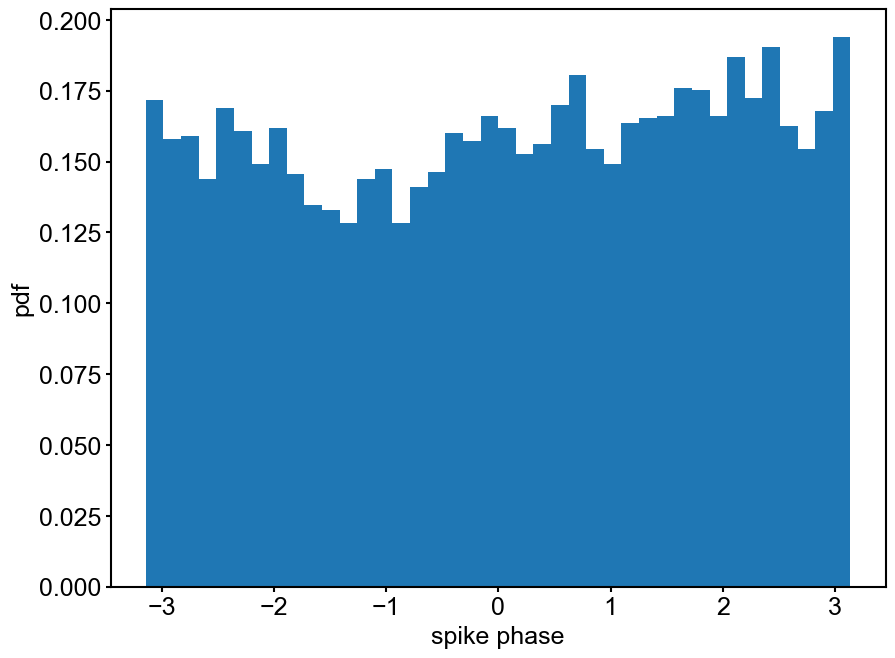

In [11]:
# pull out mic phase at spike times
mic_phase_at_spike = mic_phase[spike_idx]

# visualize with histogram
fig, ax = plt.subplots()

ax.hist(mic_phase_at_spike, bins=40, density=True)

ax.set_xlabel('spike phase')
ax.set_ylabel('pdf')


## Make figure showing spike phase histogram

<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_795814/2057242204.py:20: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xticklabels(['-$\pi$', '$\pi$'])
/tmp/ipykernel_795814/2057242204.py:20: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xticklabels(['-$\pi$', '$\pi$'])


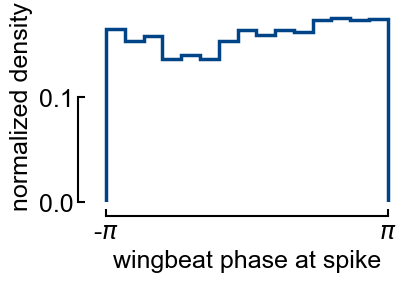

In [36]:
# make a kde plot for phase at spike
from sklearn.neighbors import KernelDensity

phase_range = np.linspace(-np.pi, np.pi, 150)
mosquito_female_color = '#004488'

# make figure
fig, ax = plt.subplots(figsize=(4,2.5))

# do KDE
# kde = KernelDensity(kernel="gaussian", bandwidth=0.35).fit(mic_phase_at_spike.reshape(-1, 1))
# log_dens = kde.score_samples(phase_range.reshape(-1, 1))
# ax.plot(phase_range, np.exp(log_dens), color=mosquito_female_color, lw=1.5)
ax.hist(mic_phase_at_spike, bins=15, density=True, color=mosquito_female_color, lw=2.5, histtype='step')  # 

# adjust axes
ax.set_ylabel('normalized density')
ax.set_xlabel('wingbeat phase at spike')
ax.set_xticks([-np.pi, np.pi])
ax.set_xticklabels(['-$\pi$', '$\pi$'])
ax = my_adjust_axes(ax)

# save
save_path = '/media/sam/SamData/Dropbox/Conferences/ICN 2024/poster/figs'
save_name = 'b1_phase_hist.svg'
fig.savefig(os.path.join(save_path, save_name),  dpi=500, bbox_inches='tight')

3.141592653589793